In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let us start with the 1D SSH Model

In [8]:
#first case with nearest neighbor hopping

# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, 0.0])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])

# Each row represents a matrix element type [aa, ab, ba, bb]
# Each column represents a unit cell index R = [-1, 0, 1]
H_r = np.array([Haa, Hab, Hba, Hbb])



In [5]:
def get_H_k(k):
    R = np.array([-1, 0, 1])
    phase = np.exp(1j * k * R)
    
    H_k = np.zeros((2, 2), dtype=complex)
    
    H_k[0, 0] = np.sum(Haa * phase)  # Haa(k)
    H_k[0, 1] = np.sum(Hab * phase)  # Hbb(k)
    H_k[1, 0] = np.sum(Hba * phase)  # Hba(k)
    H_k[1, 1] = np.sum(Hbb * phase)  # Hbb(k)
    
    return H_k

In [25]:
#JUST TESTING TO SEE IF IT MAKES SENSE
test_k_points = [-np.pi, 0, np.pi]
for k in (test_k_points):
    H = get_H_k(k)
    print(f"\n{k}")
    print(H)
    
    is_hermitian = np.allclose(H, H.conj().T)
    if is_hermitian:
        print("The Hamiltonian is Hermitian.")
    else:
        print("The Hamiltonian is NOT Hermitian.")


-3.141592653589793
[[ 0.1+0.00000000e+00j -0.3+8.57252759e-17j]
 [-0.3-8.57252759e-17j  0.1+0.00000000e+00j]]
The Hamiltonian is Hermitian.

0
[[0.1+0.j 1.1+0.j]
 [1.1+0.j 0.1+0.j]]
The Hamiltonian is Hermitian.

3.141592653589793
[[ 0.1+0.00000000e+00j -0.3-8.57252759e-17j]
 [-0.3+8.57252759e-17j  0.1+0.00000000e+00j]]
The Hamiltonian is Hermitian.


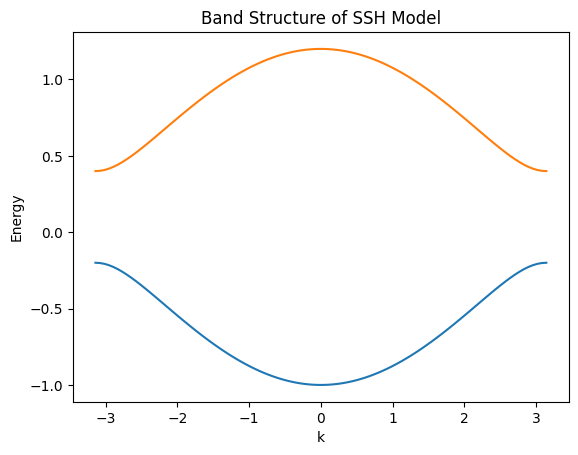

In [6]:
def plot_band_structure(k_points):
    upper_eigenvalues = []
    lower_eigenvalues = []
    for k in k_points:
        H_k = get_H_k(k)
        lower_evals, upper_evals = np.linalg.eigvalsh(H_k)
        lower_eigenvalues.append(lower_evals)
        upper_eigenvalues.append(upper_evals)

    plt.plot(k_points, lower_eigenvalues, label='Lower Band')
    plt.plot(k_points, upper_eigenvalues, label='Upper Band')
    plt.xlabel('k')
    plt.ylabel('Energy')
    plt.title('Band Structure of SSH Model')
    plt.show()

#first case with nearest neighbor hopping
# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, 0.0])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])
H_r = np.array([Haa, Hab, Hba, Hbb])
k_points = np.linspace(-np.pi, np.pi, 100)
plot_band_structure(k_points)

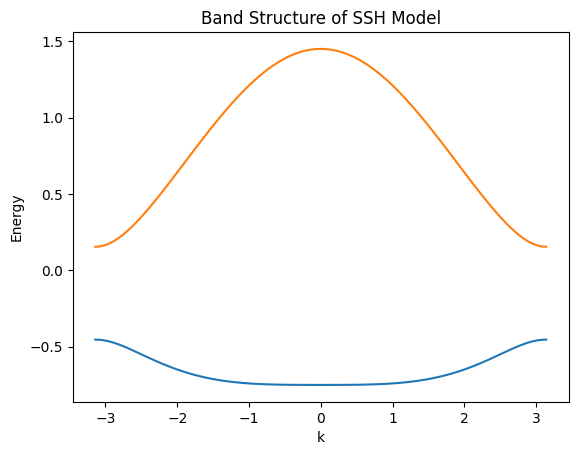

In [ ]:
#now let us add in nearest neighbour hopping

# The indices correspond to R = [-1, 0, 1]
next_nearest_hopping_aa = 0.2
next_nearest_hopping_bb = 0.3

Haa = np.array([next_nearest_hopping_aa, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, next_nearest_hopping_bb])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])

# Each row represents a matrix element type [aa, ab, ba, bb]
# Each column represents a unit cell index R = [-1, 0, 1]
H_r = np.array([Haa, Hab, Hba, Hbb])

k_points = np.linspace(-np.pi, np.pi, 100)
plot_band_structure(k_points)

# Now Let us try a 2D Model

In [17]:
#first case with nearest neighbor hopping
# this is disgusting but I do not want to rework it lol

# Each array is 3x3: rows/cols correspond to R_x = [-1,0,1], R_y = [-1,0,1]
Haa = np.array([[0.0, 0.0, 0.0],
               [0.0, 0.1, 0.0],
               [0.0, 0.0, 0.0]])

Hbb = np.array([[0.0, 0.0, 0.0],
               [0.0, 0.1, 0.0],
               [0.0, 0.0, 0.0]])

Hab = np.array([[0.0, 0.0, 0.0],
               [0.7, 0.4, 0.0],
               [0.0, 0.7, 0.0]])

Hba = np.array([[0.0, 0.7, 0.0],
               [0.0, 0.4, 0.7],
               [0.0, 0.0, 0.0]])

def get_H_k_2D(kx, ky):
    x = np.array([-1, 0, 1])
    y = np.array([-1, 0, 1])
    H_k = np.zeros((2, 2), dtype=complex)
    # 2D grid of R = (rx, ry)
    # compute phase factor for each entry
    rX, rY = np.meshgrid(x, y, indexing='ij')
    phase = np.exp(1j * (kx * rX + ky * rY))

    H_k[0, 0] = np.sum(Haa * phase)
    H_k[0, 1] = np.sum(Hab * phase)
    H_k[1, 0] = np.sum(Hba * phase)
    H_k[1, 1] = np.sum(Hbb * phase)

    return H_k

H_k_test = get_H_k_2D(0.0, 0.0)
print(H_k_test)

[[0.1+0.j 1.8+0.j]
 [1.8+0.j 0.1+0.j]]


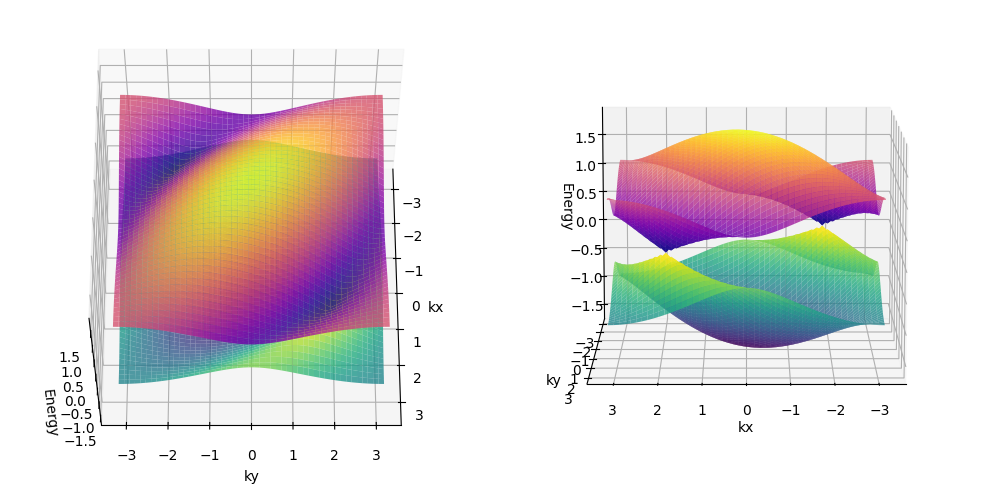

In [31]:
def plot_2D(kx_points, ky_points):
    kX, kY = np.meshgrid(kx_points, ky_points)
    lower_eigenvalues = np.zeros_like(kX)
    upper_eigenvalues = np.zeros_like(kX)
    for i, kx in enumerate(kx_points):
        for j, ky in enumerate(ky_points):
            H_k = get_H_k_2D(kx, ky)
            evals = np.linalg.eigvalsh(H_k)
            lower_eigenvalues[j, i] = evals[0]
            upper_eigenvalues[j, i] = evals[1]

    fig = plt.figure(figsize=(15, 5))

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(kX, kY, lower_eigenvalues, cmap='viridis', alpha=0.8)
    ax2.plot_surface(kX, kY, upper_eigenvalues, cmap='plasma', alpha=0.8)
    ax2.view_init(elev=60, azim=0)
    ax2.set_xlabel('kx')
    ax2.set_ylabel('ky')
    ax2.set_zlabel('Energy')

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(kX, kY, lower_eigenvalues, cmap='viridis', alpha=0.8)
    ax3.plot_surface(kX, kY, upper_eigenvalues, cmap='plasma', alpha=0.8)
    ax3.view_init(elev=10, azim=90)
    ax3.set_xlabel('kx')
    ax3.set_ylabel('ky')
    ax3.set_zlabel('Energy')

    plt.tight_layout()
    plt.show()


kx_points, ky_points = np.linspace(-np.pi, np.pi, 50), np.linspace(-np.pi, np.pi, 50)
plot_2D(kx_points, ky_points)